<img src='ds_solution_approach.png'  />

# EDA & Data Preprocessing Using Python

### Start with these questions:
>How to ensure you are ready to use machine learning algorithms in a project?<br>
>How to define the feature variables that can potentially be used for machine learning?<br>
>How to choose the most suitable algorithms for your data set?

**Exploratory Data Analysis (EDA)** helps to answer all these questions, ensuring the best outcomes for the project. It is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set

### Exploratory Data Analysis is majorly performed using the following methods:

**Missing Data Analysis** - helps in understading what data is missing and what strategies are required to handle the missing data<br>
**Outlier Analysis** - This is important in addressing any outliers that can have adverse effects on modeling<br>
**Univariate visualization** — provides summary statistics for each field in the raw data set<br>
**Bivariate visualization** — is performed to find the relationship between each variable in the dataset and the target variable of interest<br>
**Multivariate visualization** — is performed to understand interactions between different fields in the dataset<br>
**Dimensionality reduction** — helps to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data.

### Import Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'missingno'

### Load Data

In [62]:
train = pd.read_csv('train.csv')

In [63]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Part I: Exploratory Data Analysis

### Getting a feel of data

In [64]:
play_data = train.copy()
play_data.shape

(1460, 81)

In [65]:
#what data do we have?
play_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Key Tips

Keep an excel with a column listing all the features that we have in the data set<br>
Then three more columnns as below:<br>
1. Data Type
2. Significance Factor: High, Medium, Low, Delete
3. Observations

In [66]:
play_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### MSSubClass, OverallQual, YearBuilt, YrSold, MoSold, YearRemodAdd

In [67]:
numeric_features = play_data.select_dtypes(include=[np.number])
categorical_features = play_data.select_dtypes(include=[np.object])

print('Numeric Features:\n', numeric_features.columns)
print('Categorical Features:\n', categorical_features.columns)

Numeric Features:
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Categorical Features:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinT

### Summary Statistics

In [70]:
#get Summary Statistics
play_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [71]:
#Transpose summary statistics for better view
summary_stats = pd.DataFrame(play_data.describe())
summary_stats = summary_stats.T
print(summary_stats.shape)
summary_stats

(38, 8)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### What about categorical variables?

In [72]:
# finding categorical variables
categorical = [var for var in play_data.columns if play_data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 43 categorical variables


In [73]:
#get summary statistics for categorical variables
play_data.describe(include = [np.object])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [76]:
def cat_stats(df):
    cat_stats = pd.DataFrame(df.describe(include = [np.object]))
    cat_stats = cat_stats.T
    cat_stats['distribution'] = cat_stats['freq']/cat_stats['count']*100
    cat_stats.sort_values('distribution', ascending=False, inplace=True)
    return cat_stats

In [77]:
cat_stats(play_data)

,count,unique,top,freq,distribution
Utilities,1460,2,AllPub,1459,99.9315
Street,1460,2,Pave,1454,99.589
Condition2,1460,8,Norm,1445,98.9726
RoofMatl,1460,8,CompShg,1434,98.2192
Heating,1460,6,GasA,1428,97.8082
GarageCond,1379,5,TA,1326,96.1566
GarageQual,1379,5,TA,1311,95.0689
LandSlope,1460,3,Gtl,1382,94.6575
CentralAir,1460,2,Y,1365,93.4932
Functional,1460,7,Typ,1360,93.1507


In [ ]:
#Transpose categorical summary statistics
summary_stats_cat = pd.DataFrame(play_data.describe(include = [np.object]))
summary_stats_cat = summary_stats_cat.T
summary_stats_cat['distribution'] = summary_stats_cat['freq']/summary_stats_cat['count']*100
summary_stats_cat.sort_values('distribution', ascending=False)

Drop Columns: 'Street','Utilities','Condition2', 'RoofMatl', 'Heating'

### Null Detection

In [78]:
#check for null values
print('Train data with null values:\n', play_data.isnull().sum())

Train data with null values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [79]:
def na_data(df):
    play_data_na = (df.isnull().sum() / len(df)) * 100
    play_data_na = play_data_na.drop(play_data_na[play_data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :play_data_na})
    missing_data.head(20)
    return missing_data

In [80]:
na_data(play_data)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


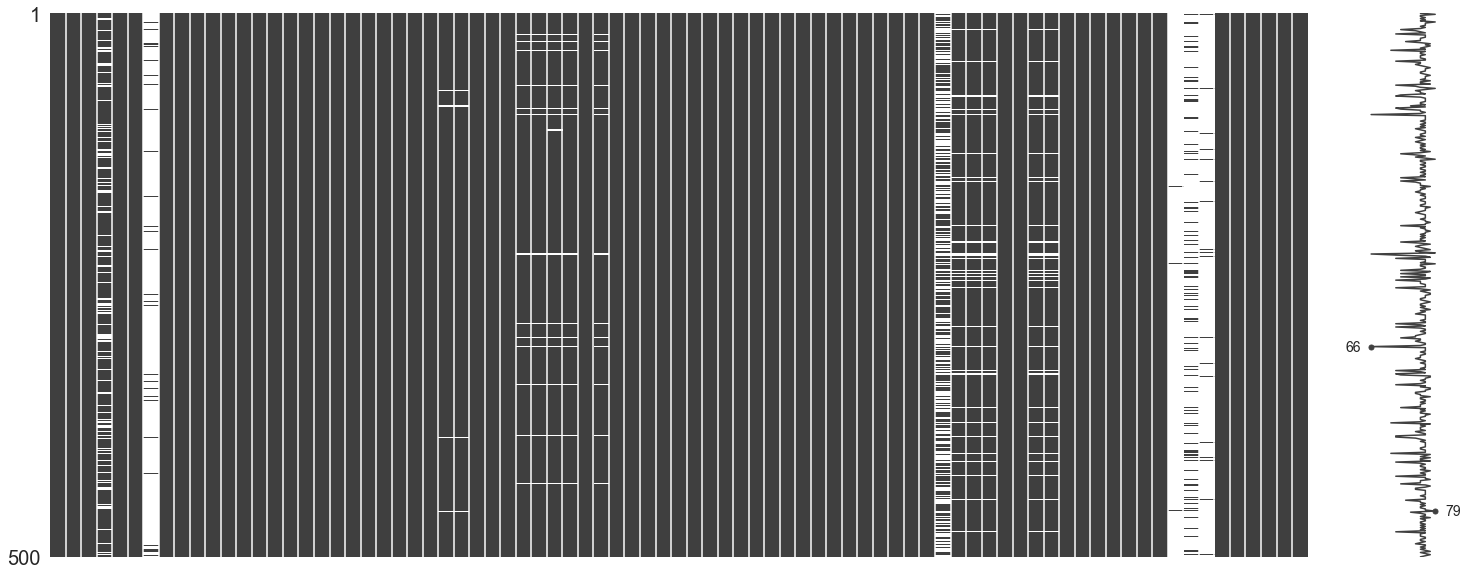

In [82]:
msno.matrix(play_data.sample(500))

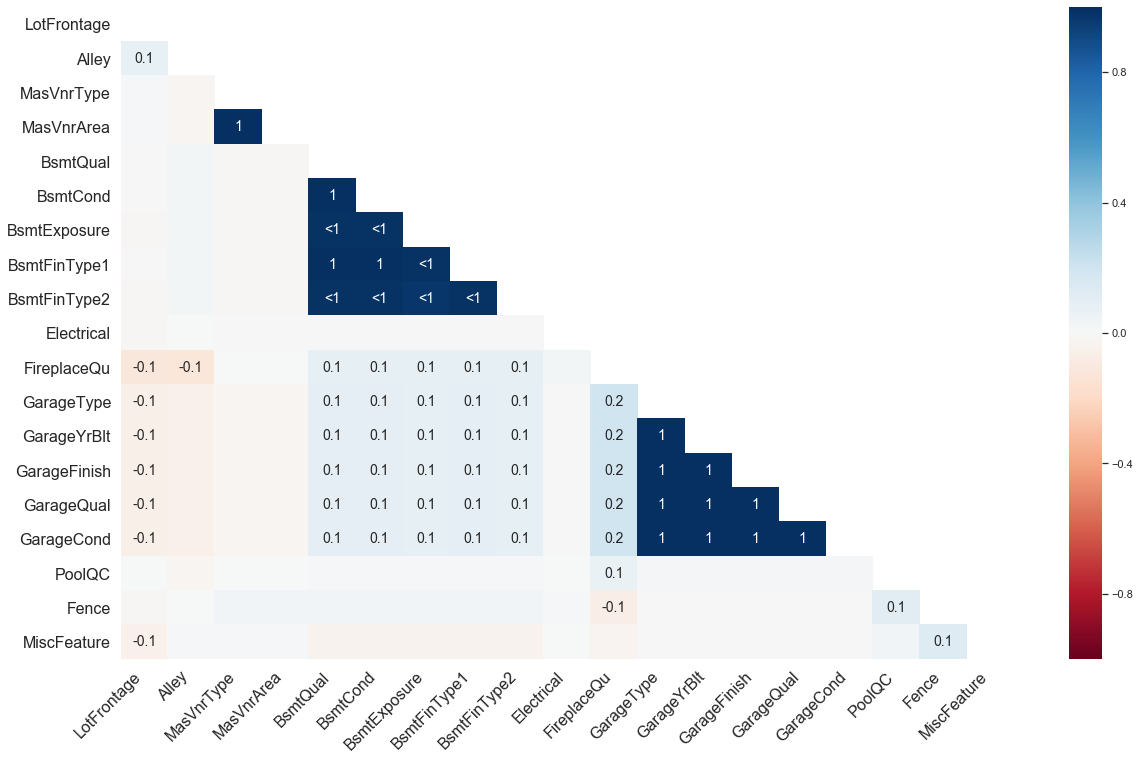

In [83]:
msno.heatmap(play_data)

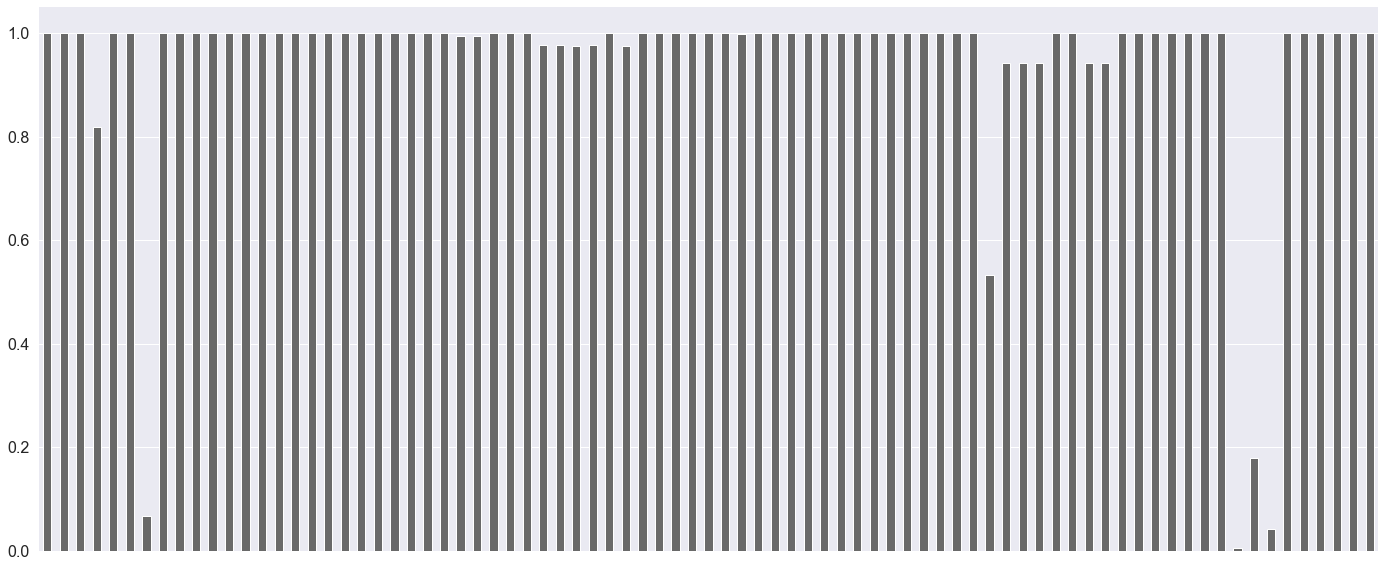

In [84]:
msno.bar(play_data.sample(1000))

### Mark the Obviously Insignificant Variables

&emsp;**1.** Features that have **>70%** NULL values<br>
&emsp;**2.** Duplicate or redundant columns.<br>
&emsp;**3.** Almost all Unique values. eg: id<br>
&emsp;**4.** Features that have **>95%** SAME values and rest as NULLS. Since these kind of features would not contibute much to dependant variable.

### Observations


**Nulls**<br>

**PoolQC, MiscFeature, Fence, Alley** columns  - >75% nulls - **But**, lets take a look at them


**Required Null Imputations:**<br>
LotFrontage, MasVnrType, MasVnrArea, GarageType, GarageYrBlt,
GarageFinish, GarageQual, Garagecond

MSZoning, Exterior1st, Exterior2nd, kitchenQual,Functional, FireplaceQual, 
GarageCars, GarageArea, SaleType


**Columns with 97% same values**<br>
'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'

GarageYrBlt is equal to YearBuilt for 1089 times in train_data so we can drop GarageYrBlt too


### Univariate Analysis <br>
### Target Variable Analysis - SalePrice

In [85]:
play_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

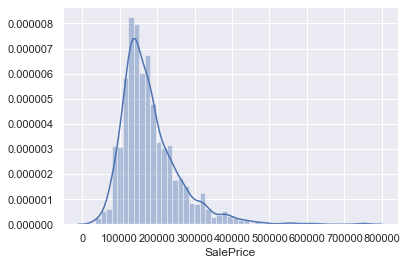

In [86]:
#histogram
sns.distplot(play_data['SalePrice'])

**Note:** Looks skewed but normal<br>
Lets see if log transformation can make it look normal

IQR value: 0.49863092538878107
# of outliers: 28


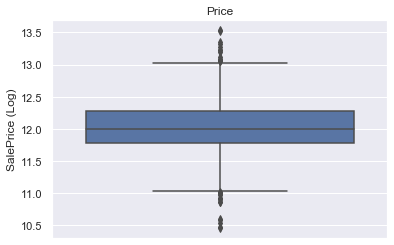

In [87]:
#  To get a visual of the outliers, let's plot a box plot.
log_sale = np.log1p(play_data['SalePrice'])
sns.boxplot(y = log_sale)
plt.ylabel('SalePrice (Log)')
plt.title('Price');

# count number of outliers after transformation is applied
Q1 = log_sale.quantile(0.25)
Q3 = log_sale.quantile(0.75)
IQR = Q3 - Q1
print("IQR value: {}\n# of outliers: {}".format(IQR,
    ((log_sale < (Q1 - 1.5 * IQR)) | (log_sale > (Q3 + 1.5 * IQR))).sum()))

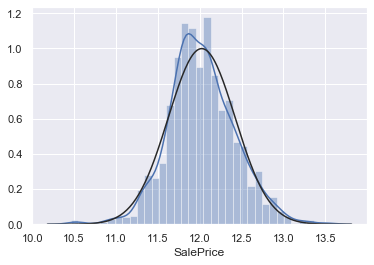

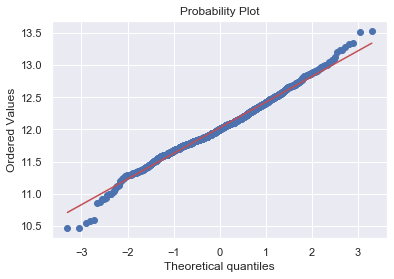

In [88]:
#applying log transformation
#transformed histogram and normal probability plot
sns.distplot(np.log1p(play_data['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log1p(play_data['SalePrice']), plot=plt)

In [89]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Correlation plot
**Helps identifying the relationship of independent variables to the target variable**

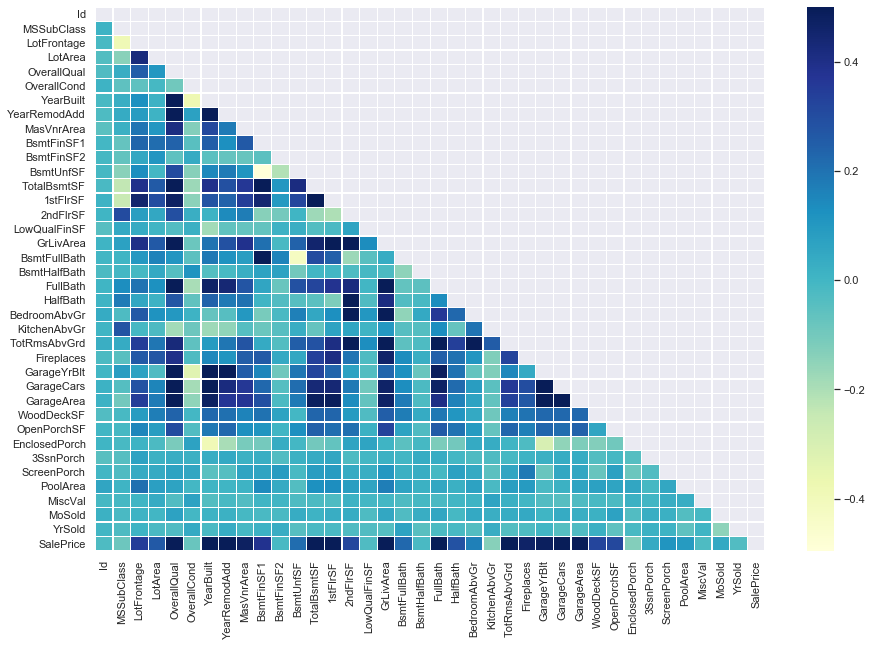

In [90]:
# Calculate correlations
corr = play_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            #annot=True, 
            fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

The heatmap is the best way to get a quick overview of correlated features

At initial glance it is observed that there are two red colored squares that get my attention.

>The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables.<br>
>Second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

<br>Heatmaps are great to detect this kind of multicollinearity situations and in problems related to feature selection like this project, it comes as an excellent exploratory tool.

Another aspect is the 'SalePrice' correlations.As it is observed that 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hello !' to SalePrice, however we cannot exclude the fact that rest of the features have some level of correlation to the SalePrice. To observe this correlation closer let us see it in Zoomed Heat Map

**Zoomed Heatmap**

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


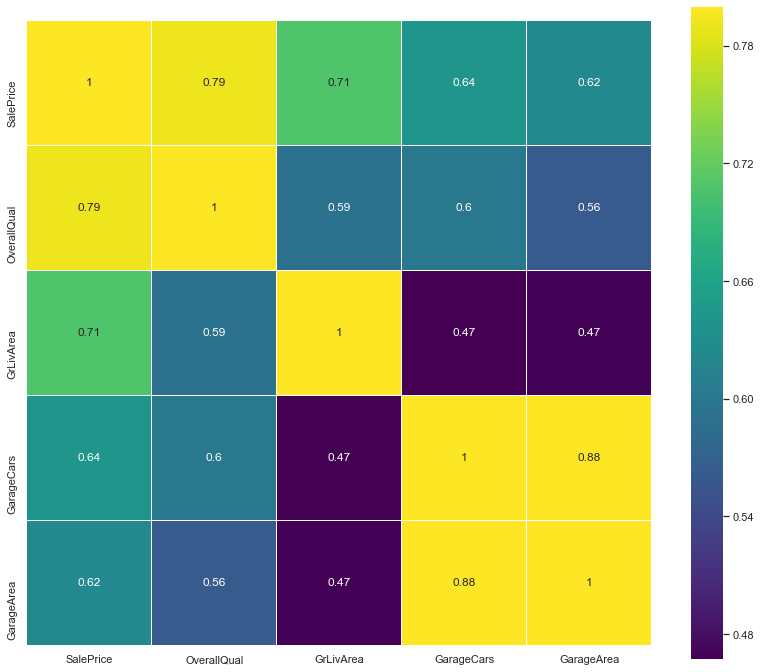

In [95]:
correlation = numeric_features.corr()
k= 5
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

## GrLivArea

Text(0, 0.5, 'SalePrice')

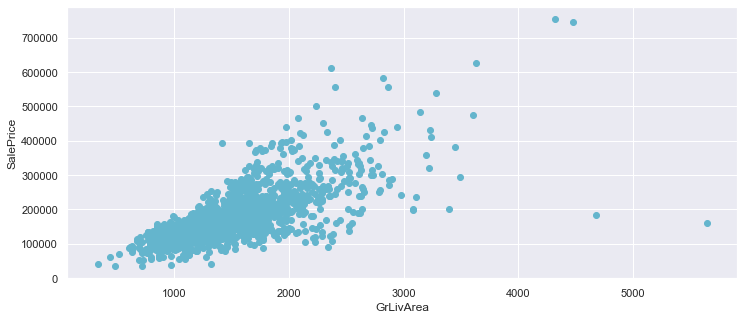

In [97]:
#scatter plot grlivarea/saleprice
plt.figure(figsize=[12,5])
plt.scatter('GrLivArea', 'SalePrice', data=play_data, color = 'c')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

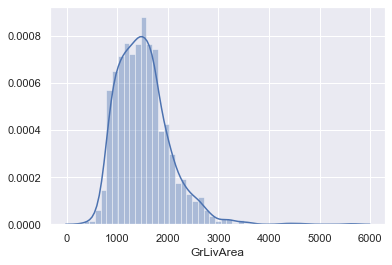

In [98]:
#histogram
sns.distplot(play_data['GrLivArea'])

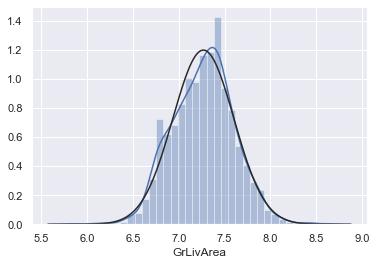

<Figure size 432x288 with 0 Axes>

In [99]:
sns.distplot(np.log1p(play_data['GrLivArea']), fit=norm);
fig = plt.figure()

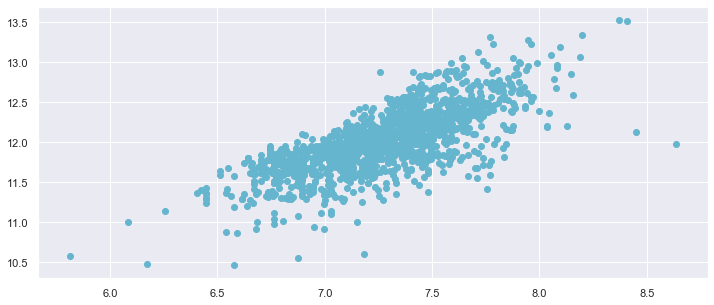

In [100]:
#scatter plot grlivarea/saleprice
plt.figure(figsize=[12,5])
plt.scatter(np.log(play_data['GrLivArea']), np.log(play_data['SalePrice']), color = 'c')

In [101]:
#check interquartile range
print(iqr(play_data['GrLivArea']))

647.25


In [107]:
np.percentile(play_data['GrLivArea'], 99)

3123.4800000000023

In [108]:
# calculating percentile funtion
def getpercentile(x, i):
    for a in range(1,11):
            a = a/10
            b = i+a
            c =np.percentile(x, b)
            print(b,"  ",c)

In [111]:
print("50th percentile: ",  
       np.percentile(play_data['GrLivArea'], 50)) 
print("75th percentile: ",  
       np.percentile(play_data['GrLivArea'], 75)) 
print("90th percentile: ",  
       np.percentile(play_data['GrLivArea'], 90)) 
print("95th percentile: ", 
np.percentile(play_data['GrLivArea'], 95))

50th percentile:  1464.0
75th percentile:  1776.75
90th percentile:  2158.3
95th percentile:  2466.1


In [112]:
print("99th percentile: ")  
getpercentile(play_data['GrLivArea'], 99)

99th percentile: 
99.1    3186.9259999999954
99.2    3223.968
99.3    3235.8700000000003
99.4    3307.536000000011
99.5    3431.659999999996
99.6    3511.8599999999988
99.7    3619.837000000001
99.8    4329.120000000017
99.9    4584.2000000000335
100.0    5642.0


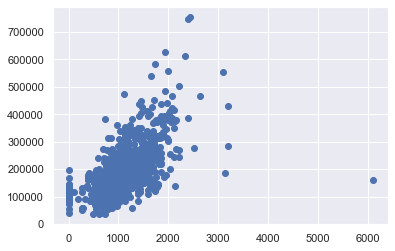

In [113]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=play_data);

In [114]:
print("50th percentile: ",  
       np.percentile(play_data['TotalBsmtSF'], 50)) 
print("75th percentile: ",  
       np.percentile(play_data['TotalBsmtSF'], 75)) 
print("90th percentile: ",  
       np.percentile(play_data['TotalBsmtSF'], 90)) 
print("99th percentile: ")  
getpercentile(play_data['TotalBsmtSF'], 99)

50th percentile:  991.5
75th percentile:  1298.25
90th percentile:  1602.2000000000003
99th percentile: 
99.1    2208.401999999995
99.2    2218.968
99.3    2307.2090000000035
99.4    2392.9840000000004
99.5    2429.8399999999965
99.6    2541.8759999999984
99.7    2920.203000000022
99.8    3143.0840000000067
99.9    3203.246000000001
100.0    6110.0


### Other Outlier detections

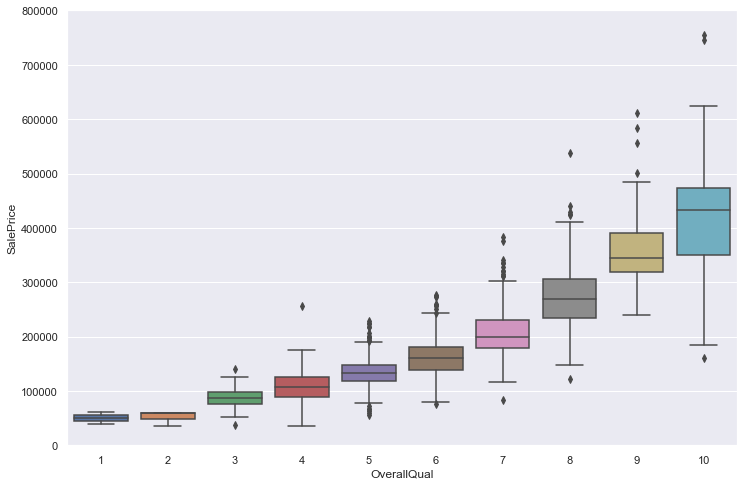

In [115]:
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=play_data)
fig.axis(ymin=0, ymax=800000);

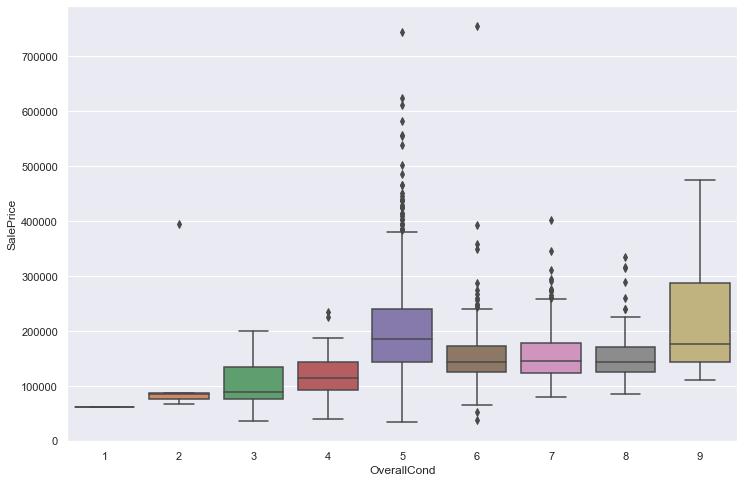

In [116]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallCond', y="SalePrice", data=play_data)

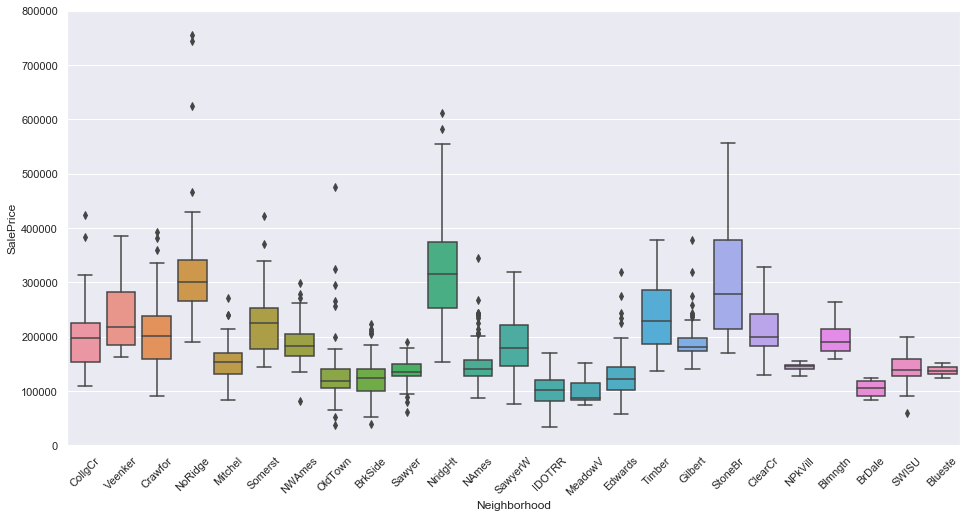

In [117]:
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=play_data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

In [124]:
len(play_data['Neighborhood'].unique())

25

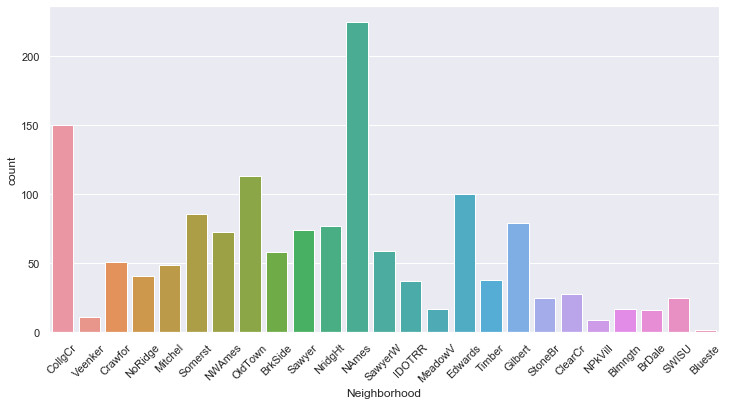

In [125]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = play_data)
xt = plt.xticks(rotation=45)

Based on the above observation can group those Neighborhoods with similar housing price into a same bucket for dimension-reduction

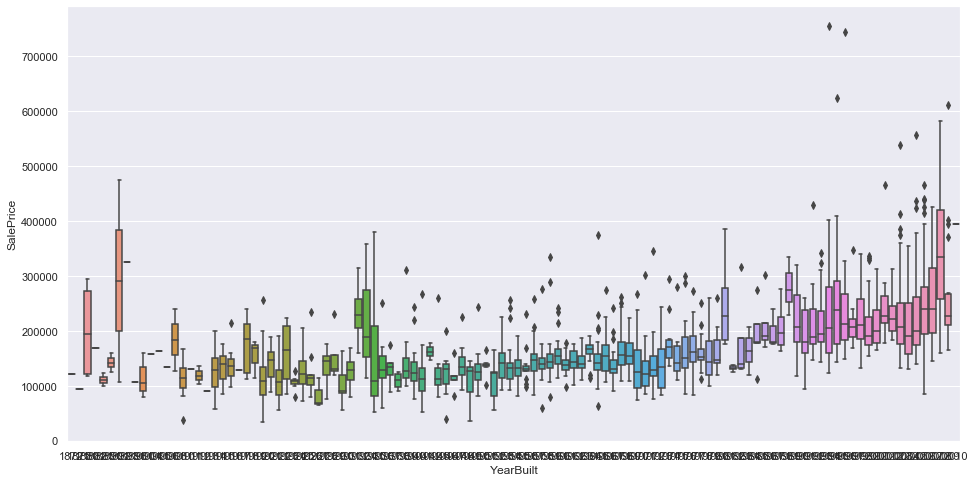

In [126]:
#box plot overallqual/saleprice
plt.figure(figsize=(16, 8))
sns.boxplot(x='YearBuilt', y="SalePrice", data=play_data)

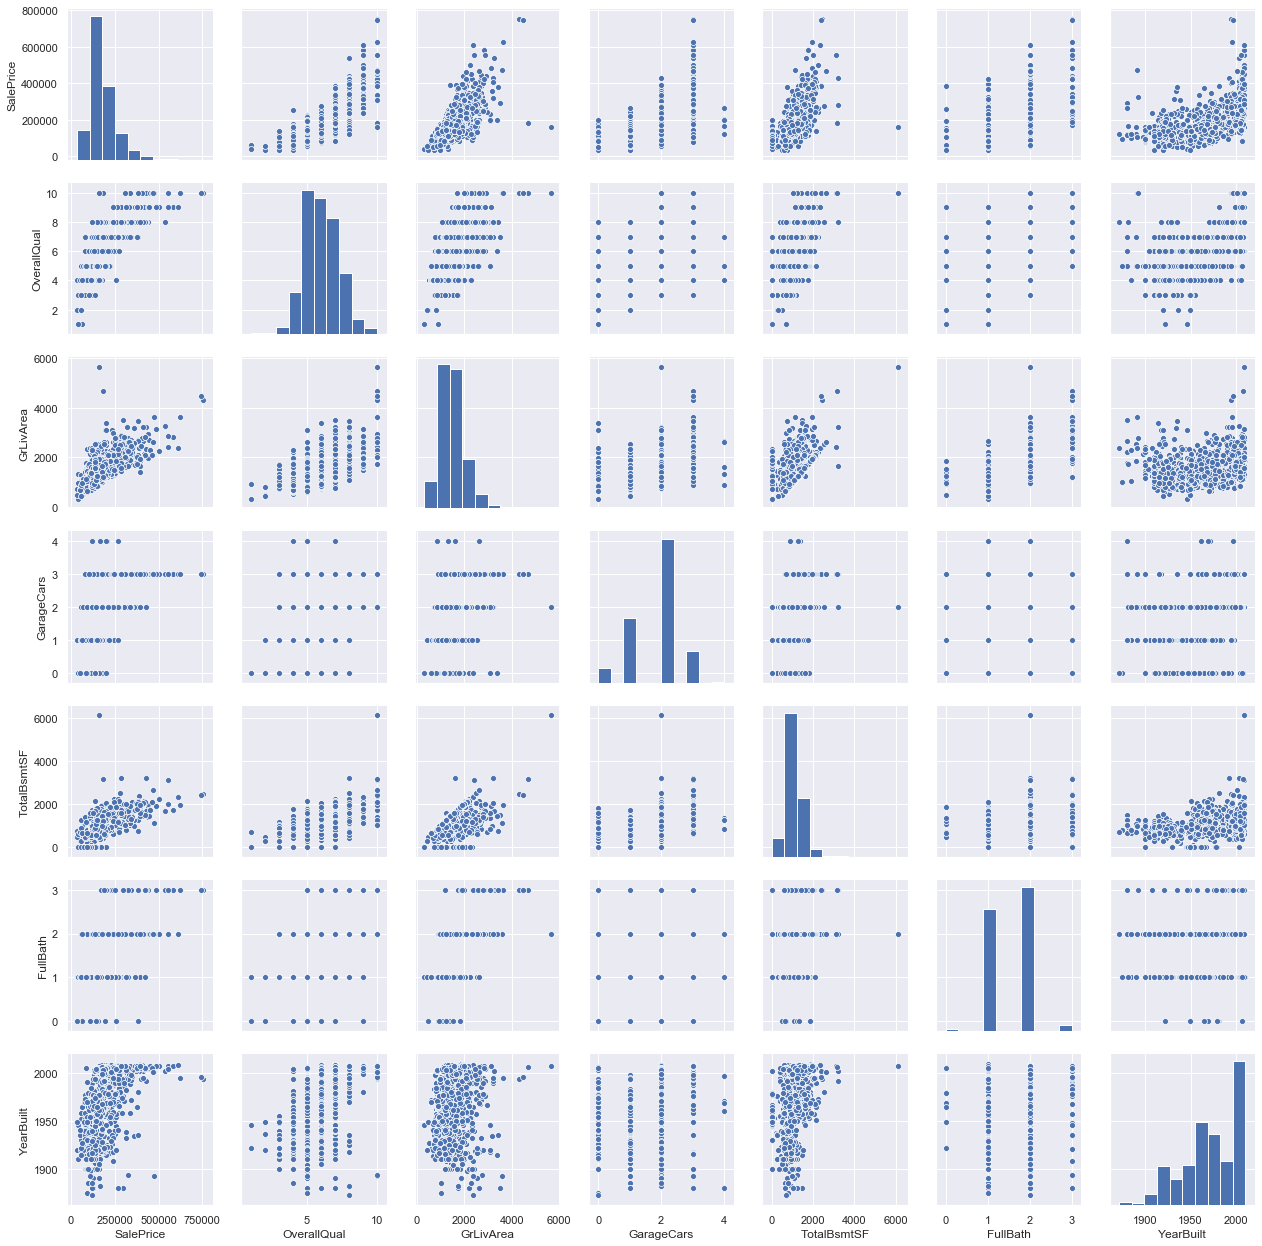

In [127]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(play_data[cols], size = 2.5)

Although we already know some of the main figures, this pair plot gives us a reasonable overview insight about the correlated features .Here are some of my analysis.

>One interesting observation is between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area.

>One more interesting observation is between 'SalePrice' and 'YearBuilt'. In the bottom of the 'dots cloud', we see what almost appears to be a exponential function.We can also see this same tendency in the upper limit of the 'dots cloud'

>Last observation is that prices are increasing faster now with respect to previous years.

#### Scatterplots between the most correlated variables

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


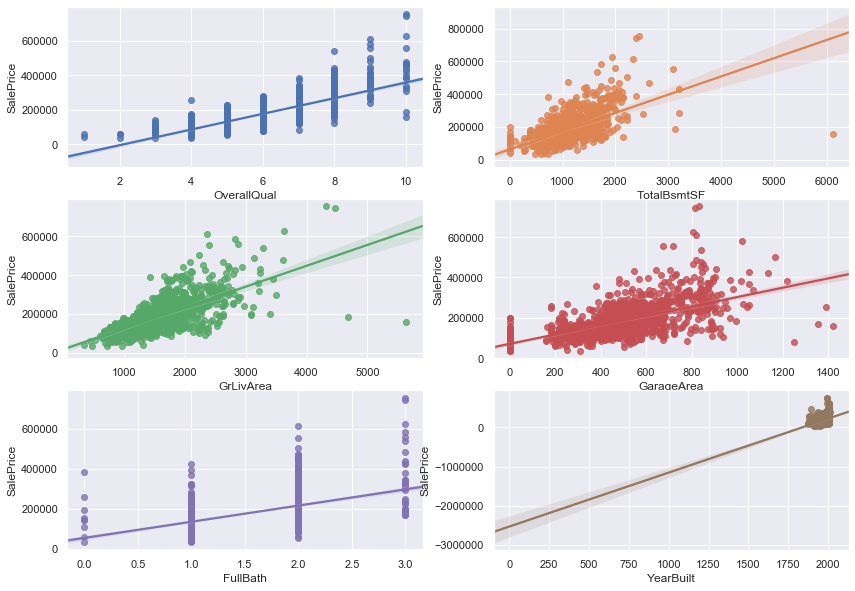

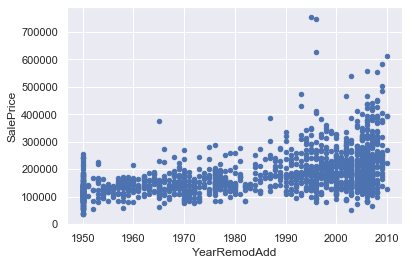

In [128]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train['SalePrice'],train['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train['SalePrice'],train['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train['SalePrice'],train['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train['SalePrice'],train['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train['SalePrice'],train['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train['SalePrice'],train['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([train['SalePrice'],train['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

### PoolQC & MiscFeature

Text(0.5, 1.0, 'MiscFeature')

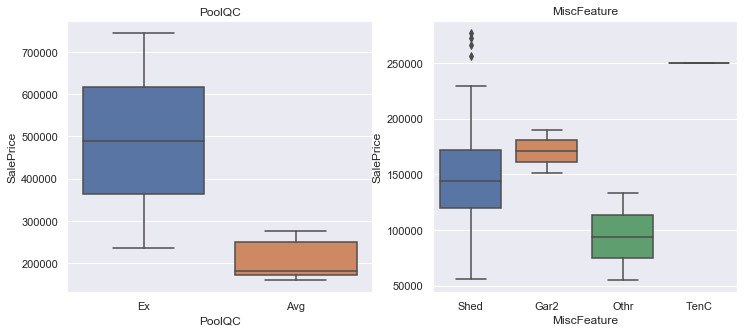

In [132]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.boxplot(x='PoolQC', y="SalePrice", data=play_data)
plt.title('PoolQC')

plt.subplot(122)
sns.boxplot(x='MiscFeature', y="SalePrice", data=play_data)
plt.title('MiscFeature')

In [131]:
cond1 = (play_data['PoolQC'] == 'Fa')
cond2 = (play_data['PoolQC'] == 'Gd')
play_data.loc[play_data['PoolQC'] == 'Fa', 'PoolQC' ] = 'Avg'
play_data.loc[cond2, 'PoolQC' ] = 'Avg'

### Categorical Variable Distribution with 'Sale Price'

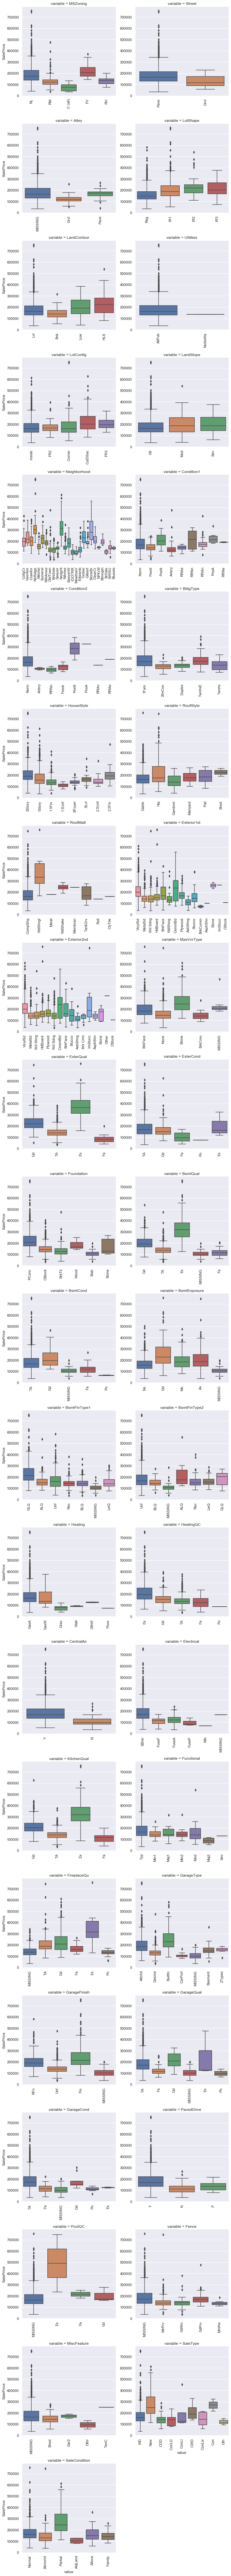

In [133]:
for c in categorical_features:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

## Part II: Data Cleansing

### convert

In [134]:
play_data.MSSubClass.dtype

dtype('int64')

In [137]:
play_data.MSSubClass.unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [138]:
cat_cols = ['MSSubClass','OverallQual']
for x in cat_cols:
    play_data[x] = play_data[x].apply(str) 

In [139]:
play_data.MSSubClass.dtype

dtype('O')

### Handling Missing Values

In [140]:
#FILL NAs with No entities
#None Columns:
none_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish',
           'GarageQual','GarageCond','PoolQC','Fence','Alley','MiscFeature','MasVnrType', 'MiscFeature']
for x in none_cols:
    play_data[x].fillna('None', inplace = True)
#mode columns
mode_cols = ['Exterior1st','Exterior2nd','SaleType','KitchenQual','Utilities','Functional','Electrical', 'MSZoning']
for y in mode_cols:
    play_data[y].fillna(play_data[y].mode()[0], inplace = True)
#zero columns
zero_cols = ['MasVnrArea','TotalBsmtSF','GarageYrBlt','GarageCars','GarageArea','BsmtFullBath','BsmtHalfBath','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF']
for z in zero_cols:
    play_data[z].fillna(0, inplace=True)

In [141]:
#BsmtExposure-one row is marked NA(nobasement) where we have values for Basement:row-949-replace the value with mode which 'No'
cond = (play_data.Id == 949)
play_data.loc[cond,'BsmtExposure'] = 'No'

#BsmtFinType2-one row marked NA(nobasement) where we have values for Basement:row-333-replace the value with mode which is 'unf'
cond2 = (play_data.Id == 333)
play_data.loc[cond2, 'BsmtFinType2'] = 'Unf'

In [142]:
# Imputing LotFrontage with the median (middle) value
play_data['LotFrontage'] = play_data.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))

### Drop Columns

In [144]:
# DROPPING COLUMNS with more than 97% same values
drop_cols = ['Street','Utilities','Condition2', 'RoofMatl', 'Heating']   #
play_data.drop(drop_cols, axis=1, inplace=True)

In [145]:
na_data(play_data)

,Missing Ratio


### Handling Outliers

In [146]:
#outliers for SalePrice by GrLivArea
cond2 = ((play_data.Id == 524) | (play_data.Id == 1299))
play_data.loc[cond2,'SalePrice'] = 611657 #imputing with max saleprice for Partial SaleType

#outliers for GrLivArea
play_data = play_data.drop(play_data[(play_data['GrLivArea']>4000) & (play_data['SalePrice']<300000)].index)
play_data.drop(play_data[play_data.Id == 1299].index, inplace=True)  


## Feature Engineering

In [147]:
#impute for Garage Year Built less than Year Built - total 9 such items in both data sets #part of feature engineerinig
cond1 = ((play_data['GarageYrBlt'] > 0) & ((play_data['GarageYrBlt']-play_data['YearBuilt']) < 0))
play_data.loc[cond1, 'GarageYrBlt'] = play_data['YearBuilt']

In [148]:
play_data['TotalSF'] = play_data['TotalBsmtSF']+play_data['GrLivArea']
play_data['TotalPorchSF'] = play_data['EnclosedPorch']+play_data['OpenPorchSF']+play_data['3SsnPorch']+play_data['ScreenPorch']

### Skewed Features

In [ ]:
def get_skew(data):
    numeric_feats = data.dtypes[data.dtypes != "object"].index
    # Check the skew of all numerical features
    skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    return skewed_feats

In [ ]:
skewed_features = get_skew(play_data)
skewness = pd.DataFrame({'Skew' :skewed_features})
print("\nSkew in numerical features: \n")
skewness.head(10)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

In [ ]:
cat_cols = ['YearBuilt','YrSold', 'YearRemodAdd', 'MoSold']
for y in cat_cols:
    play_data[y] = play_data[y].apply(str) 

In [ ]:
skewed_features = get_skew(play_data)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

In [ ]:
skewed_feats = skewness.index
play_data[skewed_feats] = np.log1p(play_data[skewed_feats])

In [ ]:
skewed_features = get_skew(play_data)
skewness = pd.DataFrame({'Skew' :skewed_features})
print("\nSkew in numerical features: \n")
skewness.head(10)